In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv("group7_data.csv")
df.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,RETAIL,QUANTITY,AMT,PROFIT,PURCHASES,RETURNS
0,5511283,2582606.0,2005-08-27,12.032232,5.361191e+07,2674419,5.271289e+07,1.692641e+07,2582606.0,91813.0
1,113645,1044197.0,2005-08-27,26.176994,4.790182e+07,1098662,4.666663e+07,1.326559e+07,1044197.0,54465.0
2,13031,418163.0,2005-08-27,3.210998,1.787935e+06,428453,2.303070e+06,8.108495e+05,418163.0,10290.0
3,5715232,369674.0,2005-08-27,32.926035,1.416920e+07,411493,1.894328e+07,1.292774e+06,369674.0,41819.0
4,3626213,367217.0,2005-08-27,1.626938,1.517627e+06,384542,1.273198e+06,5.297867e+05,367217.0,17325.0


### K-Means Clutersting with All Features

In [99]:
# convert date to float 
epoch = datetime.utcfromtimestamp(0)
df['RECENCY']=[datetime.strptime(rec, '%Y-%m-%d') for rec in df['RECENCY']]
df['RECENCY_FLOAT'] = [(rec - epoch).total_seconds() for rec in df['RECENCY']]


In [100]:
df.describe()

,VENDOR,FREQUENCY,AVG_COST,RETAIL,QUANTITY,AMT,PROFIT,PURCHASES,RETURNS,RECENCY_FLOAT
count,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02
mean,4.591729e+06,1.603493e+04,23.498894,3.849682e+05,1.721032e+04,4.316842e+05,1.049009e+05,1.603493e+04,1175.388328,1.122099e+09
std,3.013742e+06,9.949963e+04,37.180342,2.529631e+06,1.036875e+05,2.538908e+06,7.468813e+05,9.949963e+04,4585.199598,6.382045e+06
min,1.000100e+04,1.000000e+00,1.237273,3.380000e+00,1.000000e+00,9.900000e-01,-5.316025e+05,1.000000e+00,0.000000,1.091923e+09
25%,1.816342e+06,5.550000e+01,7.961002,1.369250e+03,6.550000e+01,1.776450e+03,3.588000e+01,5.550000e+01,4.000000,1.122941e+09
50%,4.813313e+06,1.124000e+03,14.000000,1.970248e+04,1.180000e+03,2.785873e+04,3.593220e+03,1.124000e+03,83.000000,1.125101e+09
75%,7.113316e+06,7.910500e+03,25.686231,1.656943e+05,8.654000e+03,2.157541e+05,4.404835e+04,7.910500e+03,640.500000,1.125101e+09
max,9.919401e+06,2.582606e+06,439.710000,5.361191e+07,2.674419e+06,5.271289e+07,1.692641e+07,2.582606e+06,91813.000000,1.125101e+09


In [101]:
df_numerical = df.drop(['RECENCY', 'VENDOR'], axis=1)

scaled_arr = StandardScaler().fit_transform(df_numerical)
df_scaled = pd.DataFrame(scaled_arr, columns=df_numerical.columns)
df_scaled.describe()

# X = df.drop(['RECENCY'], axis=1)
# sc = StandardScaler()
# df_scaled = X.copy()
# df_scaled[['FREQUENCY', 'AVG_COST', 'RETAIL', 'QUANTIY', 'AMT', 'PURCHASES', 'RETURNS', 'recency_float']] = sc.fit_transform(df_scaled[['FREQUENCY', 'AVG_COST', 'RETAIL', 'QUANTIY', 'AMT', 'PURCHASES', 'RETURNS', 'recency_float']])
# df_scaled.describe()

,FREQUENCY,AVG_COST,RETAIL,QUANTITY,AMT,PROFIT,PURCHASES,RETURNS,RECENCY_FLOAT
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-5.862626e-17,1.691501e-16,9.560254e-17,-1.968746e-17,2.740357e-16,-2.523857e-16,-5.862626e-17,2.637870e-16,1.642682e-14
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.612361e-01,-5.990834e-01,-1.522677e-01,-1.660661e-01,-1.701226e-01,-8.526935e-01,-1.612361e-01,-2.564880e-01,-4.730860e+00
25%,-1.606881e-01,-4.181408e-01,-1.517274e-01,-1.654437e-01,-1.694230e-01,-1.404827e-01,-1.606881e-01,-2.556151e-01,1.320048e-01
50%,-1.499433e-01,-2.556251e-01,-1.444760e-01,-1.546890e-01,-1.591442e-01,-1.357171e-01,-1.499433e-01,-2.383761e-01,4.706445e-01
75%,-8.169871e-02,5.886350e-02,-8.673087e-02,-8.256657e-02,-8.509619e-02,-8.152129e-02,-8.169871e-02,-1.167209e-01,4.706445e-01
max,2.580927e+01,1.120067e+01,2.105320e+01,2.564148e+01,2.060357e+01,2.253499e+01,2.580927e+01,1.977853e+01,4.706445e-01


Create T-SNE plot to identify clusterbility and clustering structure

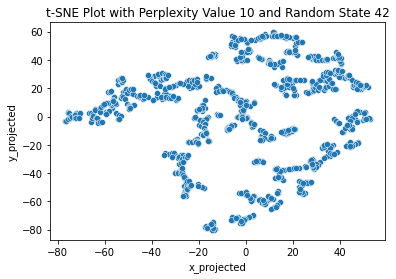

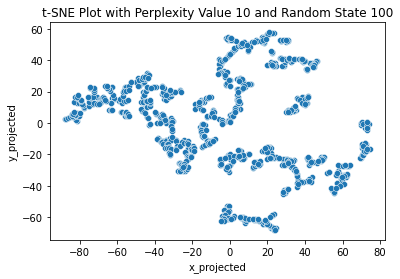

--------------------------------------------


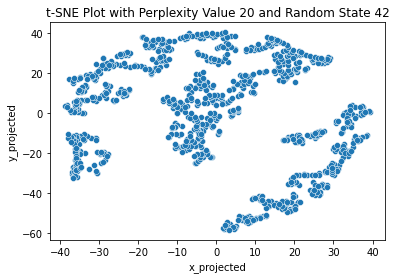

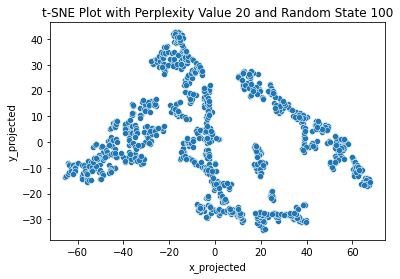

--------------------------------------------


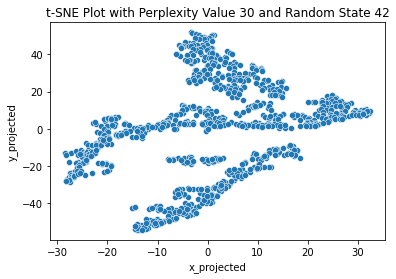

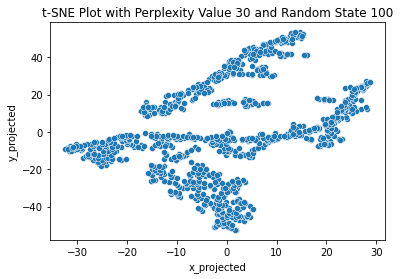

--------------------------------------------


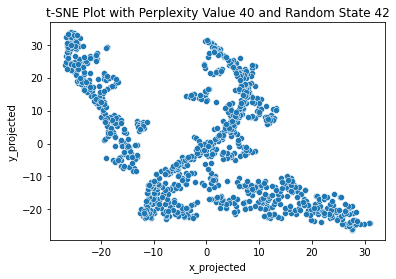

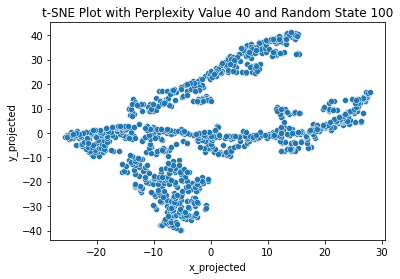

--------------------------------------------


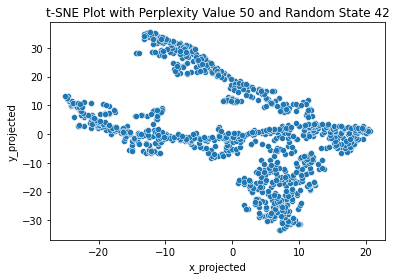

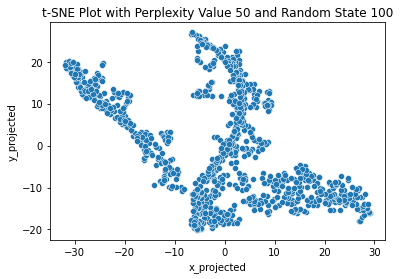

--------------------------------------------


In [87]:
for perp in [10, 20, 30, 40, 50]:
    for rs in [42, 100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_scaled)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected',  data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

The T-SNE plot suggests that:
1. There are roughly 3 clusters
2. The clusters are well-separated
3. The shape of the clusters are non-spherical

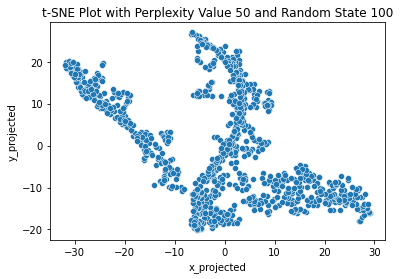

In [102]:
# pick one combination of randome state and preplexity from above
scaled_tsne = TSNE(n_components=2, perplexity=50, random_state=100)
data_scaled_tsne = scaled_tsne.fit_transform(df_scaled)
df_scaled_tsne = pd.DataFrame(data_scaled_tsne, columns=['x_projected', 'y_projected'])
df_scaled_combo = pd.concat([df, df_scaled_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_scaled_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 100))
plt.show()

Apply k-means clustering to the scaled data

In [103]:
scaled_kmeans = KMeans(n_clusters=3, random_state=100).fit(df_scaled)
df_scaled_combo['predicted_cluster_kmeans'] = scaled_kmeans.labels_

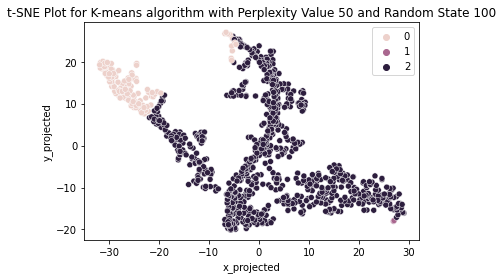

In [104]:
sns.scatterplot(x='x_projected', y='y_projected', hue='predicted_cluster_kmeans', data=df_scaled_combo)
plt.title('t-SNE Plot for K-means algorithm with Perplexity Value %s and Random State %s' %(50, 100))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Create an elbow plot to identify the number of clusters

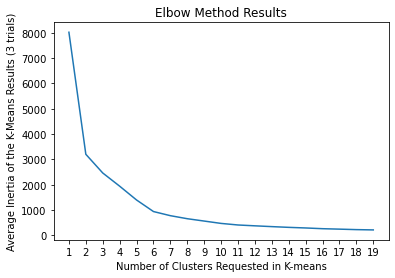

In [105]:
Ks = range(1,20)
avg_inertias = []
for k in Ks:
    sub_inertias= []   
    for i in range(0,3):
        kmeans = KMeans(n_clusters = k).fit(df_scaled)
        sub_inertias.append(kmeans.inertia_)
    avg_inertias.append(np.average(sub_inertias))

plt.plot(Ks, avg_inertias)
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results')
plt.show()

The elbow plot suggests that there are roughly 6 clusters.

### K-Means Clustering

K-means algorithm with 6 clusters as suggested by the elbow plot

In [106]:
kmeans=KMeans(n_clusters=6, random_state=100).fit(df_scaled)
df_scaled['predicted_cluster_6']=kmeans.labels_
df_scaled.head()

,FREQUENCY,AVG_COST,RETAIL,QUANTITY,AMT,PROFIT,PURCHASES,RETURNS,RECENCY_FLOAT,predicted_cluster_6
0,25.809268,-0.308580,21.053204,25.641480,20.603571,22.534988,25.809268,19.778532,0.470644,1
1,10.339129,0.072070,18.794656,10.435771,18.220794,17.630751,10.339129,11.628619,0.470644,3
2,4.043773,-0.545968,0.554925,3.968402,0.737497,0.945726,4.043773,1.988950,0.470644,4
3,3.556171,0.253694,5.452169,3.804741,7.295261,1.591338,3.556171,8.869066,0.470644,4
4,3.531464,-0.588597,0.448008,3.544670,0.331634,0.569200,3.531464,3.524096,0.470644,4


In [107]:
# add predicted_cluster to original dataframe for clustering analysis
df_copy = df.copy()
df_copy['predicted_cluster_6'] = df_scaled['predicted_cluster_6']
df_copy.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,RETAIL,QUANTITY,AMT,PROFIT,PURCHASES,RETURNS,RECENCY_FLOAT,predicted_cluster_6
0,5511283,2582606.0,2005-08-27,12.032232,5.361191e+07,2674419,5.271289e+07,1.692641e+07,2582606.0,91813.0,1.125101e+09,1
1,113645,1044197.0,2005-08-27,26.176994,4.790182e+07,1098662,4.666663e+07,1.326559e+07,1044197.0,54465.0,1.125101e+09,3
2,13031,418163.0,2005-08-27,3.210998,1.787935e+06,428453,2.303070e+06,8.108495e+05,418163.0,10290.0,1.125101e+09,4
3,5715232,369674.0,2005-08-27,32.926035,1.416920e+07,411493,1.894328e+07,1.292774e+06,369674.0,41819.0,1.125101e+09,4
4,3626213,367217.0,2005-08-27,1.626938,1.517627e+06,384542,1.273198e+06,5.297867e+05,367217.0,17325.0,1.125101e+09,4


### Create side-by-side boxplots visualizations.

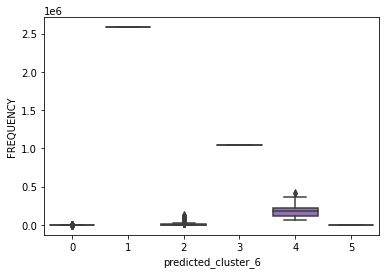

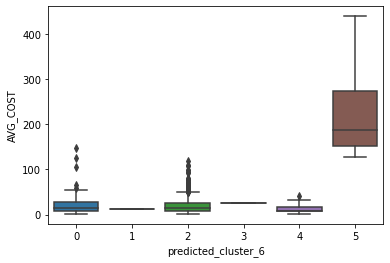

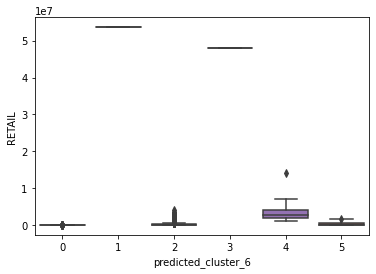

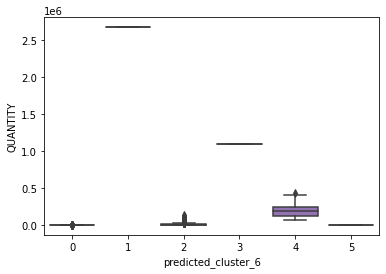

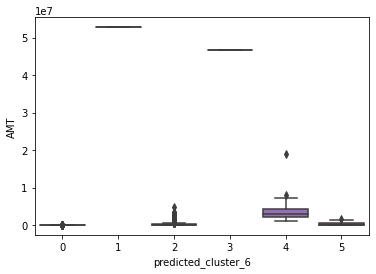

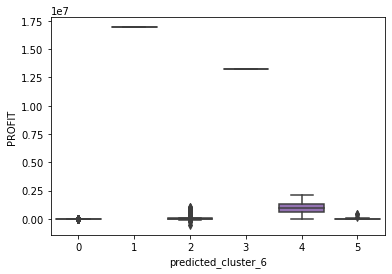

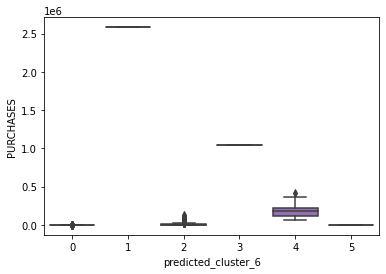

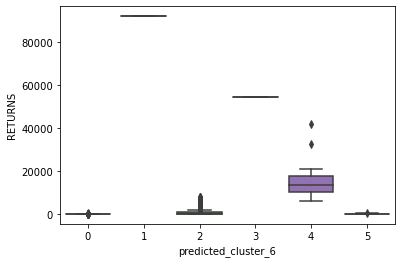

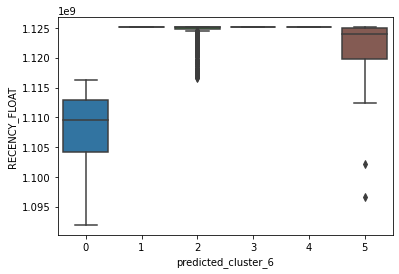

In [110]:
for i in range(11):
    if i == 0 or i == 2: continue #skip vendor and recency when plotting
    sns.boxplot(x='predicted_cluster_6', y=df_copy.iloc[:, i], data=df_copy)
    plt.show()

K-Means Clustering with 2 clusters

In [111]:
kmeans_2 = KMeans(n_clusters=2, random_state=100).fit(df_scaled)
df_scaled['predicted_cluster_2'] = kmeans_2.labels_

df_copy['predicted_cluster_2'] = df_scaled['predicted_cluster_2']
df_copy.head()

,VENDOR,FREQUENCY,RECENCY,AVG_COST,RETAIL,QUANTITY,AMT,PROFIT,PURCHASES,RETURNS,RECENCY_FLOAT,predicted_cluster_6,predicted_cluster_2
0,5511283,2582606.0,2005-08-27,12.032232,5.361191e+07,2674419,5.271289e+07,1.692641e+07,2582606.0,91813.0,1.125101e+09,1,1
1,113645,1044197.0,2005-08-27,26.176994,4.790182e+07,1098662,4.666663e+07,1.326559e+07,1044197.0,54465.0,1.125101e+09,3,1
2,13031,418163.0,2005-08-27,3.210998,1.787935e+06,428453,2.303070e+06,8.108495e+05,418163.0,10290.0,1.125101e+09,4,0
3,5715232,369674.0,2005-08-27,32.926035,1.416920e+07,411493,1.894328e+07,1.292774e+06,369674.0,41819.0,1.125101e+09,4,0
4,3626213,367217.0,2005-08-27,1.626938,1.517627e+06,384542,1.273198e+06,5.297867e+05,367217.0,17325.0,1.125101e+09,4,0


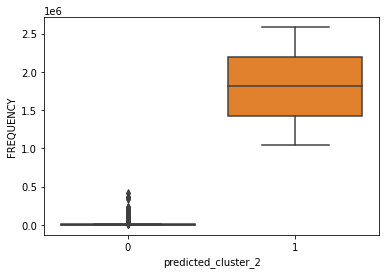

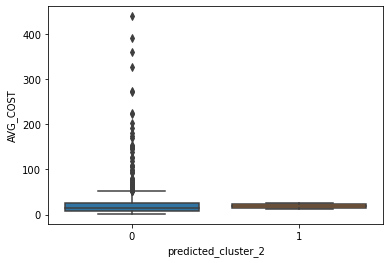

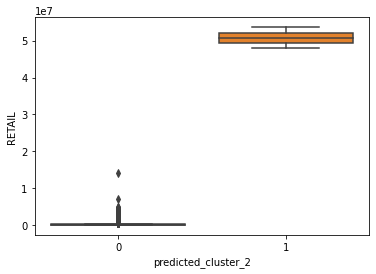

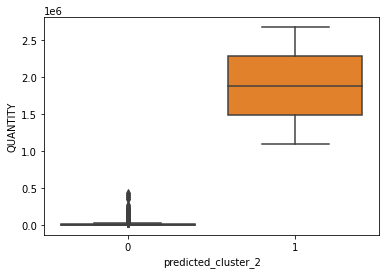

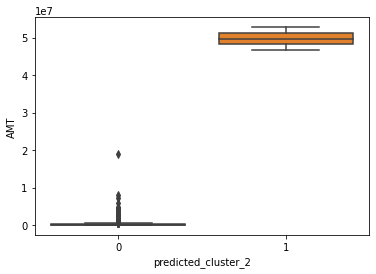

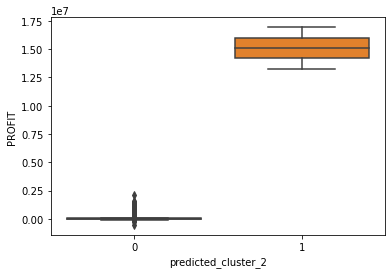

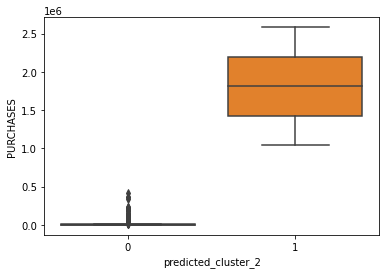

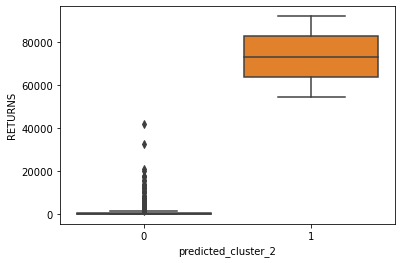

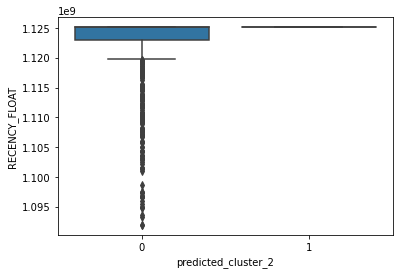

In [112]:
for i in range(11):
    if i == 0 or i == 2: continue #skip vendor and recency when plotting
    sns.boxplot(x='predicted_cluster_2', y=df_copy.iloc[:, i], data=df_copy)
    plt.show()